<a href="https://colab.research.google.com/github/Blacksmith1111/Optics/blob/main/HomeTask1vfinfinfin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
### modulator
class MyModulator:
  def __init__(self, bits_number, mod_type = "QPSK"):
    self.mod_type = mod_type
    self.bits_stream=[]
    self.bits_stream = np.random.binomial(n = 1, p = 0.5, size = bits_number)
    '''
    for i in range(8):
      bin_i = bin(i)[2:].rjust(3, '0')
      #print(f"got bits in str {bin_i}")
      bits = [int(digit) for digit in bin_i]
      #print(f"got bits {bits}")
      self.bits_stream.extend(bits)
    self.bits_stream = np.array(self.bits_stream)
'''
  def bits_to_symbols(self):
    self.symbols = []
    if self.mod_type == "16QAM":
      self.symbols = np.array([self.bits_stream[i : i + 4] if i + 4 <= len(self.bits_stream) else 0 for i in range(0, len(self.bits_stream), 4)])
      self.symbols = self.symbols if len(self.bits_stream) % 4 == 0 else self.symbols[0:-1]
    elif self.mod_type == "QPSK":
      self.symbols = np.array([self.bits_stream[i : i + 2] if i + 2 <= len(self.bits_stream) else 0 for i in range(0, len(self.bits_stream), 2)])
      self.symbols = self.symbols if len(self.bits_stream) % 2 == 0 else self.symbols[0:-1]
    elif self.mod_type == "64QAM":
      self.symbols = np.array([self.bits_stream[i : i + 6] if i + 6 <= len(self.bits_stream) else 0 for i in range(0, len(self.bits_stream), 6)])
      self.symbols = self.symbols if len(self.bits_stream) % 6 == 0 else self.symbols[0:-1]
    return self.symbols

  def mapper(self):
    self.I = np.zeros(len(self.symbols))
    self.Q = np.zeros(len(self.symbols))
    self.bin_vals = np.zeros(self.symbols.shape)
    if self.mod_type == "16QAM":
      Levels = np.array([1, 3])
      for index, symbol in enumerate(self.symbols):
        self.bin_vals[index] = symbol
        self.I[index] = (Levels[0] if (str(symbol[1]) + str(symbol[3]) == "00" or  str(symbol[1]) + str(symbol[3]) == "10") else Levels[1]) * (-1 if str(symbol[0]) + str(symbol[2]) == "01" or str(symbol[0]) + str(symbol[2]) == "00" else 1)
        self.Q[index] = (Levels[0] if str(symbol[1]) + str(symbol[3]) == "00" or str(symbol[1]) + str(symbol[3]) == "01" else Levels[1]) * (-1 if str(symbol[0]) + str(symbol[2]) == "00" or str(symbol[0]) + str(symbol[2]) == "10" else 1)

    elif self.mod_type == "QPSK":
      Levels = np.array([-1, 1])
      for index, symbol in enumerate(self.symbols):
        self.bin_vals[index] = symbol
        self.I[index] = Levels[0] if symbol[0] == 0 else Levels[1]
        self.Q[index] = Levels[0] if symbol[1] == 0 else Levels[1]

    elif self.mod_type == "64QAM":
      dict_64 = {"000000": -7 - 7j, "000001": -7 - 5j, "000010":-7 - 1j, "000011":-7 - 3j,
                          "000100":-7 + 7j, "000101":-7 + 5j, "000110":-7 + 1j, "000111":-7 + 3j,
                          "001000":-5 - 7j, "001001":-5 - 5j, "001010":-5 - 1j, "001011":-5 - 3j,
                          "001100":-5 + 7j, "001101":-5 + 5j, "001110":-5 + 1j, "001111":-5 + 3j,
                          "010000":-1 - 7j, "010001":-1 - 5j, "010010":-1 - 1j, "010011":-1 - 3j,
                          "010100":-1 + 7j, "010101":-1 + 5j, "010110":-1 + 1j, "010111":-1 + 3j,
                          "011000":-3 - 7j, "011001":-3 - 5j, "011010":-3 - 1j, "011011":-3 - 3j,
                          "011100":-3 + 7j, "011101":-3 + 5j, "011110":-3 + 1j, "011111":-3 + 3j,
                          "100000":7 - 7j, "100001":7 - 5j, "100010":7 - 1j, "100011":7 - 3j,
                          "100100":7 + 7j, "100101":7 + 5j, "100110":7 + 1j, "100111":7 + 3j,
                          "101000":5 - 7j, "101001":5 - 5j, "101010":5 - 1j, "101011":5 - 3j,
                          "101100":5 + 7j, "101101":5 + 5j, "101110":5 + 1j, "101111":5 + 3j,
                          "110000":1 - 7j, "110001":1 - 5j, "110010":1 - 1j, "110011":1 - 3j,
                          "110100":1 + 7j, "110101":1 + 5j, "110110":1 + 1j, "110111":1 + 3j,
                          "111000":3 - 7j, "111001":3 - 5j, "111010":3 - 1j, "111011":3 - 3j,
                          "111100":3 + 7j, "111101":3 + 5j, "111110":3 + 1j, "111111":3 + 3j}
      for index,symbol in enumerate(self.symbols):
        self.bin_vals[index] = symbol
        self.I[index] = np.real(dict_64[str(symbol).replace(" ", "")[1:-1]])
        self.Q[index] = np.imag(dict_64[str(symbol).replace(" ", "")[1:-1]])

    self.mapped = self.I + 1j*self.Q
    return self.mapped

  def modulate(self, shaped = 0):
    if isinstance(shaped, np.ndarray):
      self.bits_stream = shaped
    self.bits_to_symbols()
    self.mapper()
    return self.mapped


In [39]:
### demodulator
class MyDemodulator:
  def __init__(self, mapped_symbols, mod_type = "QPSK"):
    self.mod_type = mod_type
    self.mapped = mapped_symbols

  def demodulate(self):
    out_symbol = []
    self.out_bits = []
    ref_arr = []

    if self.mod_type == "16QAM":
      dict_16 = {-3 + 3j: "0111", -3 + 1j: "0011", -3 - 3j: "0101", -3 - 1j: "0001",
                 -1 + 3j: "0110", -1 + 1j: "0010", -1 - 3j: "0100", -1 - 1j: "0000",
                  3 + 3j: "1111",  3 + 1j: "1011",  3 - 3j: "1101",  3 - 1j: "1001",
                  1 + 3j: "1110",  1 + 1j: "1010",  1 - 3j: "1100",  1 - 1j: "1000"}
      levels = np.array([-3, -1, 1, 3])
      ref_arr = np.array([levels[i] + 1j * levels[k] for i in range(len(levels)) for k in range(len(levels))])
      out_symbol = np.array([ref_arr[np.argmin([np.linalg.norm(ref_arr[sec_ind] - self.mapped[index]) for sec_ind in range(len(ref_arr))])] for index in range(len(self.mapped))])
      self.out_bits = [dict_16[out_symbol[index]] for index in range(len(self.mapped))]
      self.out_bits = np.array([int(digit) for string in self.out_bits for digit in string])

    elif self.mod_type == "QPSK":
      dict_qpsk = {1 + 1j: "11", -1 +1j: "01", -1 -1j: "00", 1 - 1j: "10"}
      levels = np.array([-1, 1])
      ref_arr = np.array([levels[i] + 1j * levels[k] for i in range(len(levels)) for k in range(len(levels))])
      out_symbol = np.array([ref_arr[np.argmin([np.linalg.norm(ref_arr[sec_ind] - self.mapped[index]) for sec_ind in range(len(ref_arr))])] for index in range(len(self.mapped))])
      self.out_bits = [dict_qpsk[out_symbol[index]] for index in range(len(self.mapped))]
      self.out_bits = np.array([int(digit) for string in self.out_bits for digit in string])

    elif self.mod_type == "64QAM":
      prevdict_64 = {"000000": -7 - 7j, "000001": -7 - 5j, "000010":-7 - 1j, "000011":-7 - 3j,
                          "000100":-7 + 7j, "000101":-7 + 5j, "000110":-7 + 1j, "000111":-7 + 3j,
                          "001000":-5 - 7j, "001001":-5 - 5j, "001010":-5 - 1j, "001011":-5 - 3j,
                          "001100":-5 + 7j, "001101":-5 + 5j, "001110":-5 + 1j, "001111":-5 + 3j,
                          "010000":-1 - 7j, "010001":-1 - 5j, "010010":-1 - 1j, "010011":-1 - 3j,
                          "010100":-1 + 7j, "010101":-1 + 5j, "010110":-1 + 1j, "010111":-1 + 3j,
                          "011000":-3 - 7j, "011001":-3 - 5j, "011010":-3 - 1j, "011011":-3 - 3j,
                          "011100":-3 + 7j, "011101":-3 + 5j, "011110":-3 + 1j, "011111":-3 + 3j,
                          "100000":7 - 7j, "100001":7 - 5j, "100010":7 - 1j, "100011":7 - 3j,
                          "100100":7 + 7j, "100101":7 + 5j, "100110":7 + 1j, "100111":7 + 3j,
                          "101000":5 - 7j, "101001":5 - 5j, "101010":5 - 1j, "101011":5 - 3j,
                          "101100":5 + 7j, "101101":5 + 5j, "101110":5 + 1j, "101111":5 + 3j,
                          "110000":1 - 7j, "110001":1 - 5j, "110010":1 - 1j, "110011":1 - 3j,
                          "110100":1 + 7j, "110101":1 + 5j, "110110":1 + 1j, "110111":1 + 3j,
                          "111000":3 - 7j, "111001":3 - 5j, "111010":3 - 1j, "111011":3 - 3j,
                          "111100":3 + 7j, "111101":3 + 5j, "111110":3 + 1j, "111111":3 + 3j}
      dict_64 = {val:key for key, val in prevdict_64.items()}
      levels = np.array([-7, -5, -3, -1, 1, 3, 5, 7])
      ref_arr = np.array([levels[i] + 1j * levels[k] for i in range(len(levels)) for k in range(len(levels))])
      out_symbol = np.array([ref_arr[np.argmin([np.linalg.norm(ref_arr[sec_ind] - self.mapped[index]) for sec_ind in range(len(ref_arr))])] for index in range(len(self.mapped))])
      self.out_bits = [dict_64[out_symbol[index]] for index in range(len(self.mapped))]
      self.out_bits = np.array([int(digit) for string in self.out_bits for digit in string])

    return self.out_bits

In [72]:
### ber, noise and figures
def ber_count(start_bits, proc_bits):
    return np.sum(np.logical_xor(start_bits, proc_bits)) / len(start_bits)

def Noise_generator(mapped, snr):
  mapped_number = len(mapped)
  root_points_power = np.linalg.norm(mapped) / np.sqrt(mapped_number)
  noise_power = (root_points_power ** 2) / (2 * (10 ** (snr / 10)))
  Re = np.random.normal(0, scale = np.sqrt(noise_power), size = mapped_number)
  Im = np.random.normal(0, scale = np.sqrt(noise_power), size = mapped_number)
  return Re + 1j * Im

def plot_constellation(mapped, bin_vals, mod_type = "QPSK"):
  plt.figure(figsize = (10, 10))
  plt.scatter(np.real(mapped), np.imag(mapped), color= 'red')

  for (x, y, txt) in zip(np.real(mapped), np.imag(mapped), bin_vals):
    needed = str(txt).replace(",", "")
    needed = needed.replace("[", "")
    needed = needed.replace("]", "")
    needed = needed.replace(".", "")
    needed = needed.replace(" ", "")
    plt.text(x, y, needed, fontsize = 13)

  if mod_type == "16QAM":
    plt.title('16QAM Constellation')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
  elif mod_type == "QPSK":
     plt.title('QPSK Constellation')
     plt.xlim(-2, 2)
     plt.ylim(-2, 2)
  elif mod_type =="64QAM":
    plt.title('64QAM Constellation')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)

  plt.xlabel('I')
  plt.ylabel('Q')
  plt.grid(True)
  plt.axhline(0, color = 'black', lw = 0.5)
  plt.axvline(0, color = 'black', lw = 0.5)

  plt.show()

In [50]:
### graphs creation
def BER_of_SNR(ber = 1, snr = 10, Npts = 4, mod_type = "QPSK", ccdm_ber = 0, ess_ber = 0, avg_power = 0, avg_power_ccdm = 0, avg_power_ess = 0):
  gamma = np.power(10, (snr / 10)) / np.log2(Npts) # from db to ratio
  if mod_type == "QPSK":
    myber = 0.5 * sp.erfc(np.sqrt(2 * gamma / 2))
  elif mod_type == "16QAM" or mod_type == "64QAM":
    myber = (4 / np.log2(Npts)) * (1 - 1 / np.sqrt(Npts)) * 0.5 * sp.erfc(np.sqrt(3 * np.log2(Npts) * gamma /(2 * (Npts - 1))))

  plt.figure(figsize = (8, 8))
  plt.plot(snr, ber, color = 'black', label = f'Uniform, Avg. power: {avg_power:.2f} dB')
  plt.plot(snr, myber, color = 'blue', label = "Theory")
  if isinstance(ccdm_ber, np.ndarray):
    plt.plot(snr, ccdm_ber, color = 'red', label = f'CCDM shaping, Avg. power: {avg_power_ccdm:.2f} dB')
  if isinstance(ess_ber, np.ndarray):
    plt.plot(snr, ess_ber, color = 'green', label = f'ESS shaping, Avg. power: {avg_power_ess:.2f} dB')
  plt.yscale('log')
  plt.xlabel("SNR(db)")
  plt.ylabel("BER")
  title = "BER(SNR) " + mod_type
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()





In [42]:
### shaping
def shaping(sh_type, input_bits):
  #print(input_bits, len(input_bits), "\n")
  if(len(input_bits) % 3 != 0):
    num_zeros_to_add = 3 - (len(input_bits) % 3)
    input_bits = np.append(input_bits, [0] * num_zeros_to_add)
  #print(input_bits, "\n")
  ccdm_dict = {"000": "00011", "001": "00101", "010": "00110", "011": "01001", "100": "01010", "101": "01100", "110": "10001", "111": "10010"}
  spherical_dict = {"000": "00000", "001": "00001", "010": "00010", "011": "00100", "100": "01000", "101": "10000", "110": "00011", "111": "00101"}
  shaped_bits = []
  for i in range(0, len(input_bits), 3):
    symbol = "".join([str(digit) for digit in input_bits[i : i + 3]])
    shaped_bits.append(ccdm_dict[symbol] if sh_type == "ccdm" else spherical_dict[symbol])
  shaped_bits = "".join(shaped_bits) if len("".join(shaped_bits)) % 2 == 0 else ("".join(shaped_bits))[:-1]
  shaped_bits = shaped_bits if len(shaped_bits) % 10 == 0 else shaped_bits + "00000"
  ph_bits = np.random.binomial(n = 1, p = 0.5, size = len(shaped_bits))

  ph_amp_str = ""
  for i in range(len(shaped_bits)):
    ph_amp_str += str(ph_bits[i])
    ph_amp_str += shaped_bits[i]

  ph_shaped_bits = np.array([int(ph_amp_str[j]) for j in range(len(ph_amp_str))])
  return ph_shaped_bits

In [56]:
def shaping_testing(num_bits, mod_type = "QPSK"):
  Num_pts = 4 if mod_type == "QPSK" else 16 if mod_type == "16QAM" else 64
  snr = np.linspace(0, 20, 20)
  ber = np.zeros(len(snr))
  ccdm_ber = np.zeros(len(snr))
  ess_ber = np.zeros(len(snr))
  obj = MyModulator(num_bits, mod_type)
  avg_power = 0
  ccdm_obj = MyModulator(num_bits, mod_type)
  avg_power_ccdm = 0
  ess_obj = MyModulator(num_bits, mod_type)
  avg_power_ess = 0
  obj_mod = obj.modulate()
  ccdm_mod = ccdm_obj.modulate(shaped = shaping("ccdm", ccdm_obj.bits_stream))
  ess_mod = ess_obj.modulate(shaping("ess", ess_obj.bits_stream))
  for ind, val in enumerate(snr):
    avg_power += 10 * np.log10(np.linalg.norm(obj_mod) ** 2 / len(obj.mapped))
    avg_power_ccdm += 10 * np.log10(np.linalg.norm(ccdm_mod) ** 2 / len(ccdm_obj.mapped))
    avg_power_ess += 10 * np.log10(np.linalg.norm(ess_mod) ** 2 / len(ess_obj.mapped))

    noise = obj_mod + Noise_generator(obj.mapped, val)
    ccdm_noise = ccdm_mod + Noise_generator(ccdm_obj.mapped, val)
    ess_noise = ess_mod + Noise_generator(ess_obj.mapped, val)

    dem_obj = MyDemodulator(noise, mod_type)
    dem_ccdm_obj = MyDemodulator(ccdm_noise, mod_type)
    dem_ess_obj = MyDemodulator(ess_noise, mod_type)

    ber[ind] = ber_count(obj.bits_stream, dem_obj.demodulate())
    ccdm_ber[ind] = ber_count(ccdm_obj.bits_stream, dem_ccdm_obj.demodulate())
    ess_ber[ind] = ber_count(ess_obj.bits_stream, dem_ess_obj.demodulate())

  avg_power /= len(snr)
  avg_power_ccdm /= len(snr)
  avg_power_ess /= len(snr)
  BER_of_SNR(snr = snr, mod_type = mod_type, Npts = Num_pts, ber = ber, ccdm_ber = ccdm_ber, ess_ber = ess_ber, avg_power = avg_power, avg_power_ccdm = avg_power_ccdm, avg_power_ess = avg_power_ess)

In [60]:
def testing(num_bits, mod_type = "QPSK"):
  Num_pts = 4 if mod_type == "QPSK" else 16 if mod_type == "16QAM" else 64
  snr = np.linspace(0, 20, 20)
  ber = np.zeros(len(snr))
  obj = MyModulator(num_bits, mod_type)
  obj_mod = obj.modulate()
  plot_constellation(obj_mod, obj.bin_vals, mod_type)
  avg_power = 0
  for ind, val in enumerate(snr):
    avg_power += 10 * np.log10(np.linalg.norm(obj_mod) ** 2 / len(obj.mapped))
    noise = obj_mod + Noise_generator(obj.mapped, val)
    dem_obj = MyDemodulator(noise, mod_type)
    ber[ind] = ber_count(obj.bits_stream, dem_obj.demodulate())
  avg_power /= len(snr)
  BER_of_SNR(snr = snr, mod_type = mod_type, Npts = Num_pts, ber = ber, avg_power = avg_power)

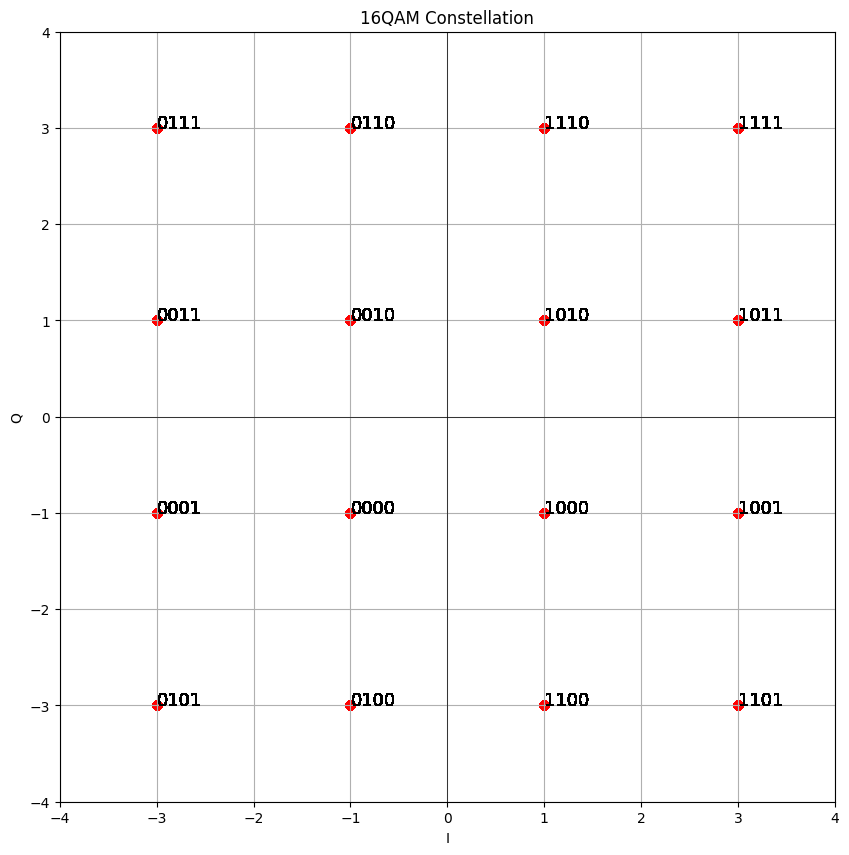

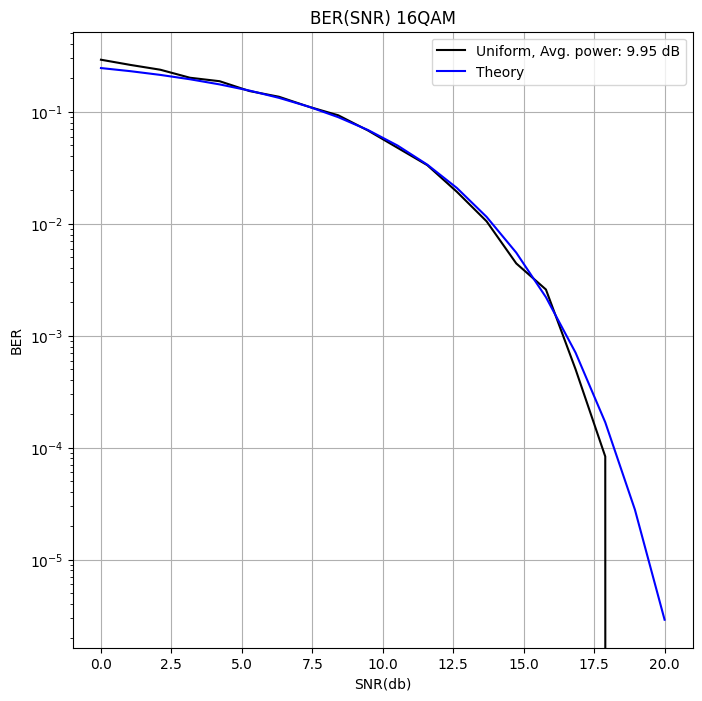

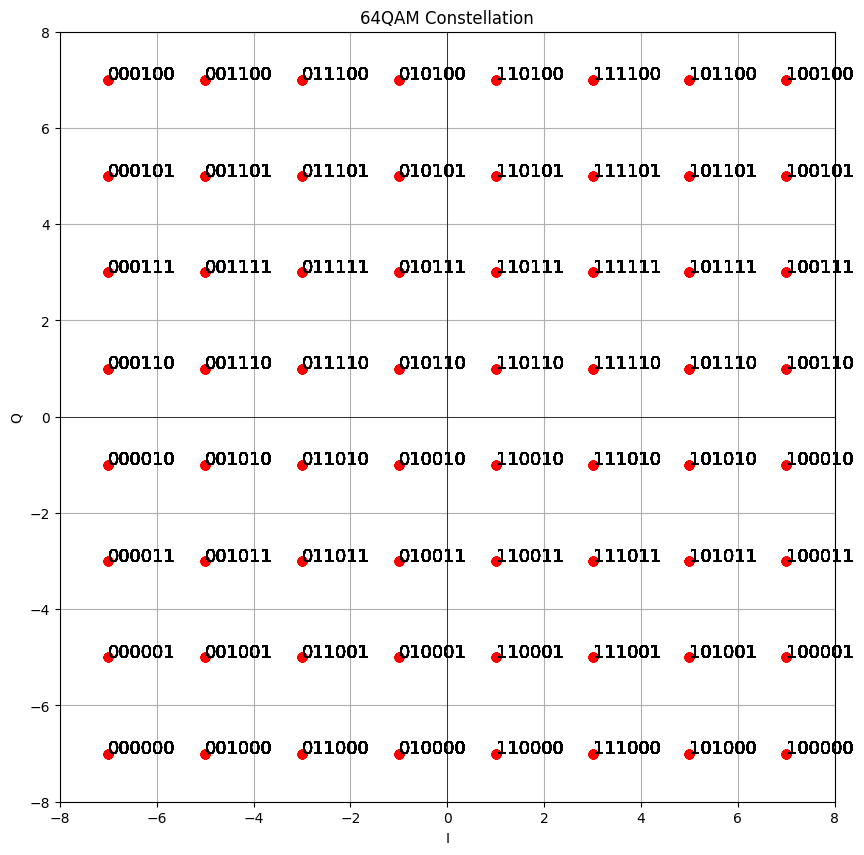

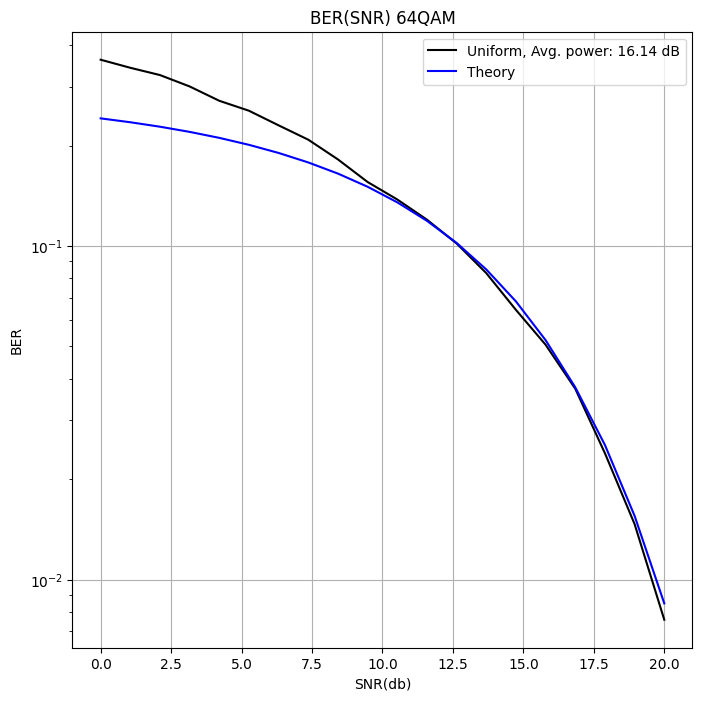

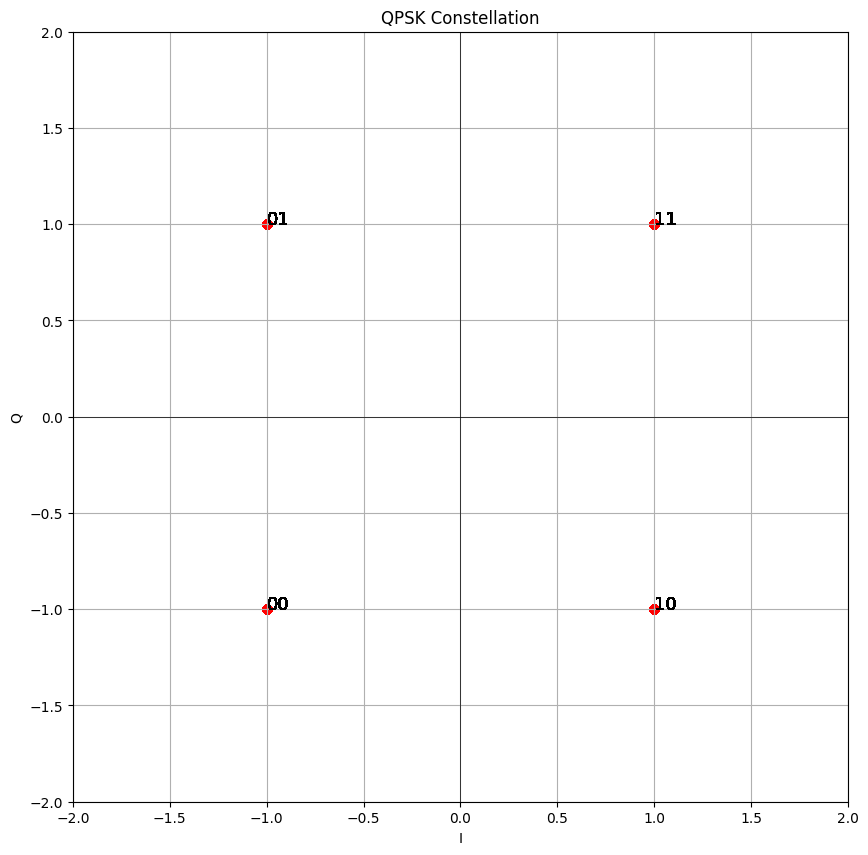

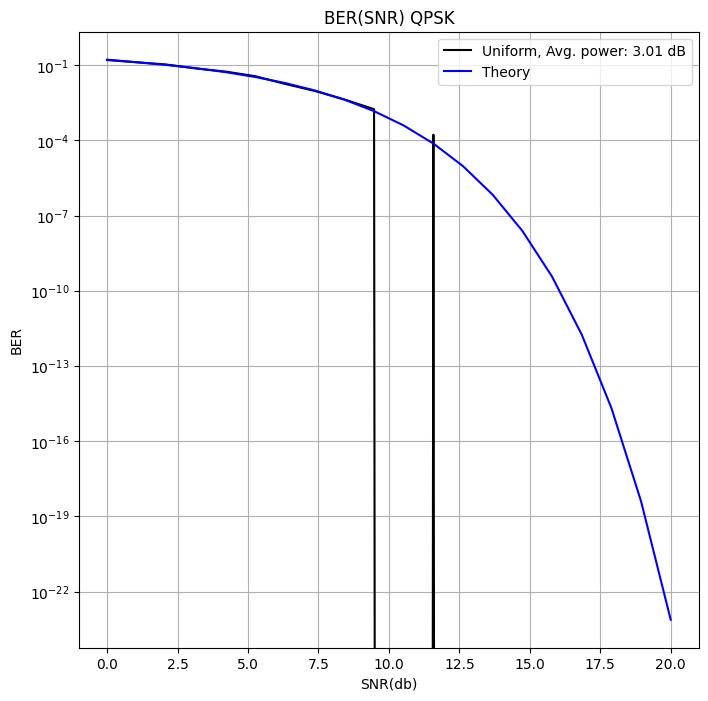

'\ntesting(num_bits, "64QAM")\ntesting(num_bits)\n'

In [73]:
### testing
num_bits = 12000


#shaping_testing(num_bits, "16QAM")
testing(num_bits, "16QAM")
testing(num_bits, "64QAM")
testing(num_bits)
'''
testing(num_bits, "64QAM")
testing(num_bits)
'''



